# Flight Dataset - Peers
Author: Haorui Lyu (haoruil2@illinois.edu)  
Class: IS445-Data Visualization  
Professor: Andrew Uhe  
Semester: Spring 2024  
Project: Final

## Dataset Information
Name of dataset: Reporting Carrier On-Time Performance (1987-present)  
Dataset link: [https://www.transtats.bts.gov/DataIndex.asp](https://www.transtats.bts.gov/DataIndex.asp)  
Source data retrieved from US Department of Transportation, Bureau of Transportation Statistics: [https://www.transtats.bts.gov](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr)  
License: The Airline On-Time Performance Data, as published by the U.S. Department of Transportation (DOT) through its Bureau of Transportation Statistics (BTS), is generally available under the U.S. government's public domain policy. This means the data is not covered by copyright and can be freely used, shared, and modified by the public.

## Data Processing
Since the original dataset contains flight data spanning many years, it is too large for effective analysis. We used DataCleaning.ipynb to extract all flight information for the year 2022 from this dataset for separate analysis.  

## Characteristics of this dataset
This dataset contains flight data collected during the specified period (2022). It includes information on flight schedules, actual departure and arrival times, delays, cancellations and the reasons for these disruptions. The data can be used to analyze trends in flight on-time performance, identify common causes of delays and cancellations, and evaluate airline performance over time.  
It contains information about the flight, such as airline, departure and landing location, whether it is canceled, delay time, etc.  
In total, the data file is about 114 MB, has 687,860 rows. Some data are strings, some are numbers, and some are dates.  

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data
data = pd.read_csv(r"D:\PersonalFiles\IS445\FinalProject\data_2022.csv")
data

,FL_DATE,AIRLINE,AIRLINE_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2022-11-19,Delta Air Lines Inc.,DL,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
1,2022-07-22,United Air Lines Inc.,UA,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
2,2022-05-01,Southwest Airlines Co.,WN,1011,BWI,"Baltimore, MD",BDL,"Hartford, CT",1735,1738.0,...,0.0,65.0,68.0,53.0,283.0,NaN,NaN,NaN,NaN,NaN
3,2022-05-05,JetBlue Airways,B6,1273,JFK,"New York, NY",CHS,"Charleston, SC",803,800.0,...,0.0,129.0,106.0,86.0,636.0,NaN,NaN,NaN,NaN,NaN
4,2022-11-12,Delta Air Lines Inc.,DL,2706,GRR,"Grand Rapids, MI",MSP,"Minneapolis, MN",730,720.0,...,0.0,96.0,76.0,61.0,408.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687855,2022-10-13,Alaska Airlines Inc.,AS,731,SEA,"Seattle, WA",SFO,"San Francisco, CA",1335,1330.0,...,0.0,128.0,122.0,97.0,679.0,NaN,NaN,NaN,NaN,NaN
687856,2022-02-09,Delta Air Lines Inc.,DL,2841,ATL,"Atlanta, GA",EWR,"Newark, NJ",815,806.0,...,0.0,124.0,115.0,93.0,746.0,NaN,NaN,NaN,NaN,NaN
687857,2022-11-13,American Airlines Inc.,AA,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
687858,2022-11-02,American Airlines Inc.,AA,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN


## Chart 1: Line chart of Delay and Cancellation Distribution over the Year

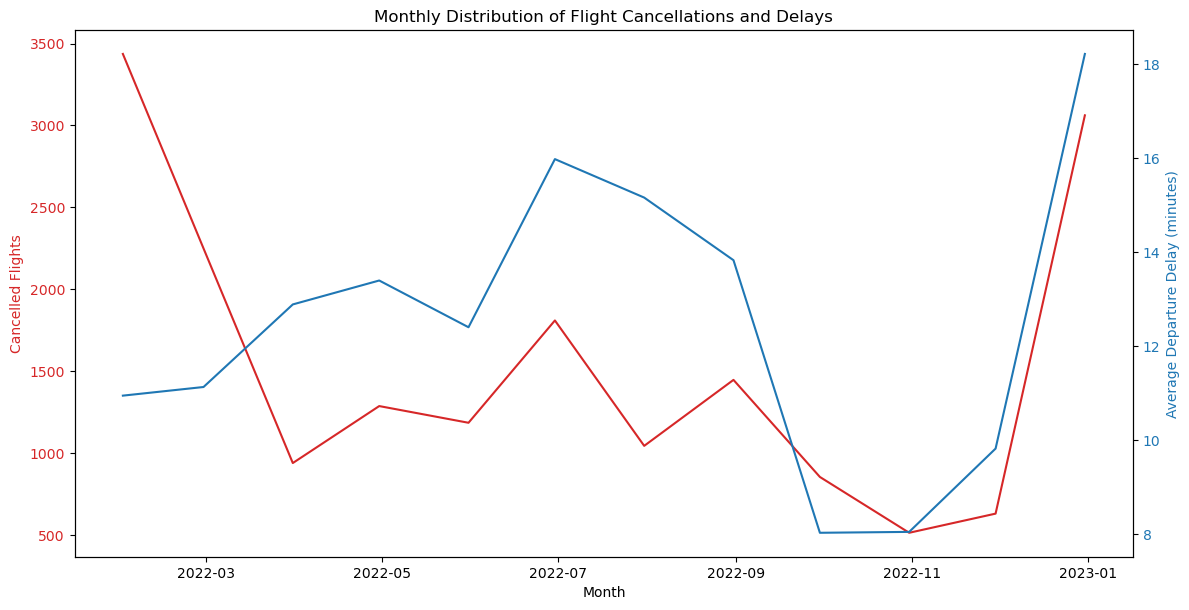

In [3]:
# Convert the 'FL_DATE' column to datetime format
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'])

# Set 'FL_DATE' as the index of the dataframe
data.set_index('FL_DATE', inplace=True)

# Resample the data to a monthly frequency, summing the 'CANCELLED' flights and calculating the mean 'DEP_DELAY'
monthly_data = data.resample('M').agg({'CANCELLED': 'sum', 'DEP_DELAY': 'mean'})

# plot the chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configure the first y-axis (left side) to plot the number of cancelled flights
color = 'tab:red'
ax1.set_xlabel('Month')  
ax1.set_ylabel('Cancelled Flights', color=color)  
ax1.plot(monthly_data.index, monthly_data['CANCELLED'], color=color) 
ax1.tick_params(axis='y', labelcolor=color)  

# Create a second y-axis (right side) to plot the average departure delays
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average Departure Delay (minutes)', color=color) 
ax2.plot(monthly_data.index, monthly_data['DEP_DELAY'], color=color)  
ax2.tick_params(axis='y', labelcolor=color)  

fig.tight_layout()
plt.title('Monthly Distribution of Flight Cancellations and Delays')
plt.show()

## Chart2: Scatter plot of the correlation between departure delays and arrival delays

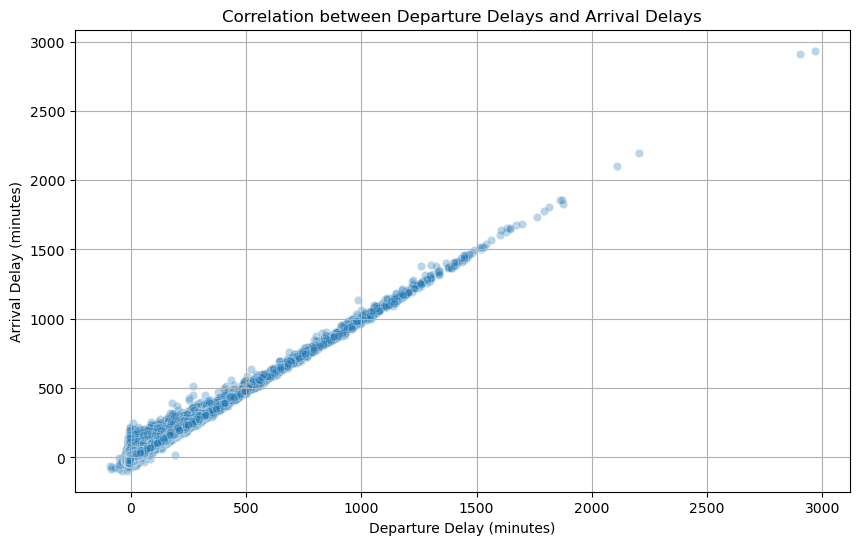

In [4]:
# Remove rows where 'DEP_DELAY' or 'ARR_DELAY' are NaN (missing values) from the data
cleaned_data = data.dropna(subset=['DEP_DELAY', 'ARR_DELAY'])

# plot the chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=cleaned_data, alpha=0.3)
plt.title('Correlation between Departure Delays and Arrival Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True) # Enable grid lines for better readability of the plot
plt.show()

## Chart 3: Box Plot of Distribution by Airline

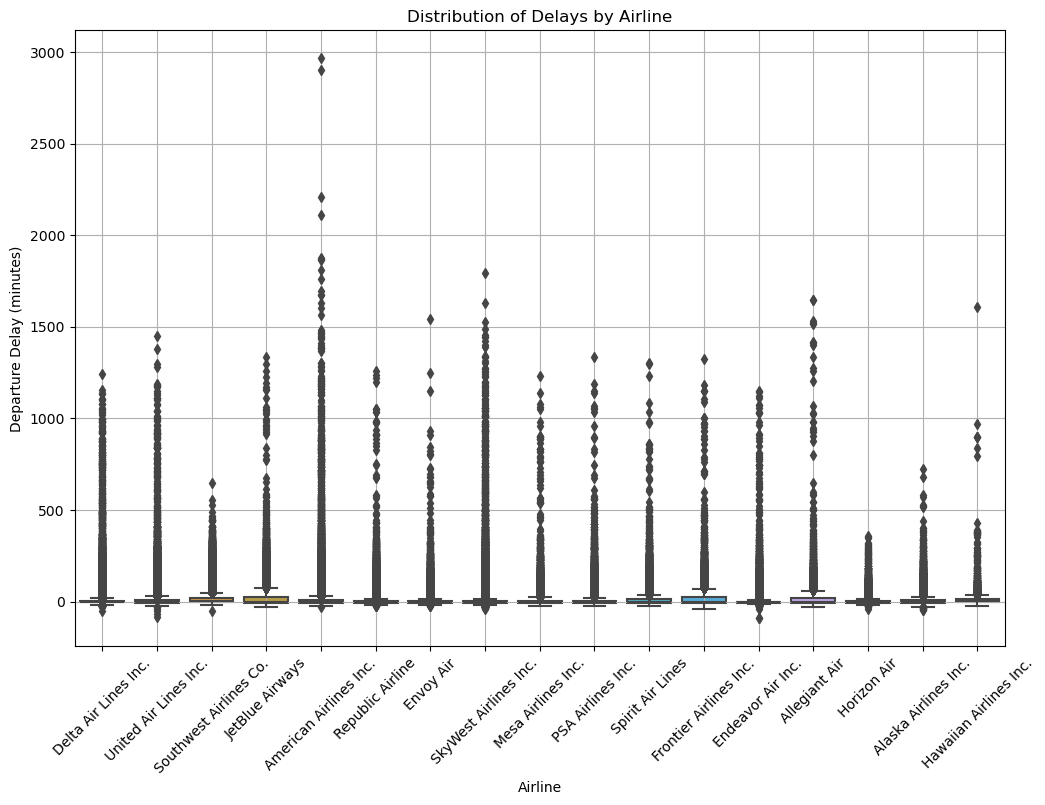

In [5]:
# Remove rows from the data where 'DEP_DELAY' or 'AIRLINE' have missing values
cleaned_data = data.dropna(subset=['DEP_DELAY', 'AIRLINE'])

# plot the chart
plt.figure(figsize=(12, 8))
sns.boxplot(x='AIRLINE', y='DEP_DELAY', data=cleaned_data)
plt.title('Distribution of Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=45) # Rotate the labels on the x-axis by 45 degrees
plt.grid(True) # Enable grid lines for easier interpretation of the plot
plt.show()